In [2]:
import omicverse as ov
import scanpy as sc
ov.ov_plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.8, Tutorials: https://omicverse.readthedocs.io/


In [3]:
import scanpy as sc

In [4]:
pwd

'/root/notebooks'

In [5]:
ll

total 33065504
-rw-r--r-- 1 root        40492 Apr 15 19:53 SM.ipynb
-rw-r--r-- 1 root         1650 Apr 16 13:51 Untitled1.ipynb
-rw-r--r-- 1 root        35629 Apr 16 19:33 clustering_space.ipynb
-rw-r--r-- 1 root   3828919618 Apr 16 17:26 filtered_250adata.h5ad
-rw-r--r-- 1 root   2302178496 Apr 16 17:50 filtered_300adata.h5ad
-rw-r--r-- 1 root  13245143518 Apr 15 19:55 filtered_adata.h5ad
-rw-r--r-- 1 root       165649 Apr 17 09:49 preprocess.ipynb
-rw-r--r-- 1 22954 14482560400 Apr 15 17:16 raw.cluster.h5ad
-rw-r--r-- 1 root        14421 Apr 16 19:33 raw_cluster.ipynb


In [6]:
adata_300 = sc.read_h5ad("filtered_300adata.h5ad")

In [7]:
adata_300.var_names_make_unique()

In [8]:
adata_300.obs_names_make_unique()

In [9]:
adata_300

AnnData object with n_obs × n_vars = 119708 × 1000
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden'
    var: 'DisplayName', 'Barcode', 'CodeClass', 'ProbeID'
    uns: 'leiden', 'log1p', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'scaled|original|X_pca', 'spatial'
    varm: 'scaled|original|pca_loadings'
    layers: 'counts', 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [10]:
## 输出obs例名
colobs_list = list(adata_300.obs.columns)
print(colobs_list)

['fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden']


In [11]:
if 'mito_perc' in adata_300.obs.columns:
    print("Y")
else:
    print("N")

N


In [12]:
# 首先确认 mito_perc 是否存在于 adata.obs 中
if 'mito_perc' in adata_300.obs.columns:
    # 若存在，则打印 mito_perc 的值
    print(adata.obs['mito_perc'])
else:
    print("mito_perc 不在 adata.obs 中，请确认数据集是否包含此信息。")

mito_perc 不在 adata.obs 中，请确认数据集是否包含此信息。


In [13]:



#                                           预处理

In [14]:
 ##  第一步：质控
adata_300_qc=ov.pp.qc(adata_300,
              tresh={'mito_perc': 0.05, 'nUMIs': 100, 'detected_genes': 150})


Calculate QC metrics
End calculation of QC metrics.
Original cell number: 119708
Begin of post doublets removal and QC plot
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    Scrublet finished (0:07:46)
Cells retained after scrublet: 119708, 0 removed.
End of post doublets removal and QC plots.
Filters application (seurat or mads)
Lower treshold, nUMIs: 100; filtered-out-cells: 73284
Lower treshold, n genes: 150; filtered-out-cells: 9212
Lower treshold, mito %: 0.05; filtered-out-cells: 0
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its chosen option

In [17]:
""" 
    解释：mito_perc是指基因表达比例超过5%时，该细胞可能会被标记为低质量细胞并被移除
          nUMIs:低于500个UMIs的细胞可能信号较弱，因此也可能被移除
         detected_genes:于250个基因表达的细胞可能由于测序深度不足等原因，被认为数据质量较差而被移除

"""

' \n    解释：mito_perc是指基因表达比例超过5%时，该细胞可能会被标记为低质量细胞并被移除\n          nUMIs:低于500个UMIs的细胞可能信号较弱，因此也可能被移除\n         detected_genes:于250个基因表达的细胞可能由于测序深度不足等原因，被认为数据质量较差而被移除\n\n'

In [15]:
adata_300_qc

AnnData object with n_obs × n_vars = 31651 × 1000
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'DisplayName', 'Barcode', 'CodeClass', 'ProbeID', 'mt', 'n_cells'
    uns: 'leiden', 'log1p', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap', 'scrublet'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'scaled|original|X_pca', 'spatial

In [40]:
"""
if "nCount_RNA" in adata_300.obs.columns:
   filter_300adata_s = adata_300[adata_300.obs["nCount_RNA"] >= 400]
else:
    print("没有")
"""

'\nif "nCount_RNA" in adata_300.obs.columns:\n   filter_300adata_s = adata_300[adata_300.obs["nCount_RNA"] >= 400]\nelse:\n    print("没有")\n'

In [41]:
"""
temp = list(adata_300.obs.columns)
print(temp)
"""

'\ntemp = list(adata_300.obs.columns)\nprint(temp)\n'

In [16]:
## 第二步：gene detection
# (1) 将原始counts储存到unils下
temp = ov.utils.store_layers(adata_300_qc,layers="counts")

......The X of adata have been stored in counts


In [ ]:
"""
解释：将 adata 中名为 'counts' 的原始计数数据存储到 adata.uns 的一个特定键 'layers_counts' 下，名字也是"counts"
""


In [17]:
# (2) 标准化或者HVGs
adata_300 = ov.pp.preprocess(adata_300_qc, mode='shiftlog|pearson',n_HVGs=2000,)
## 先使用shiftlog归一化，然后用person进行HVGs，选择数目为2000个

Begin robust gene identification
After filtration, 1000/1000 genes are kept. Among 1000 genes, 1000 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


In [74]:
ov.pp.pca(adata_300,layer='scaled',n_pcs=10)

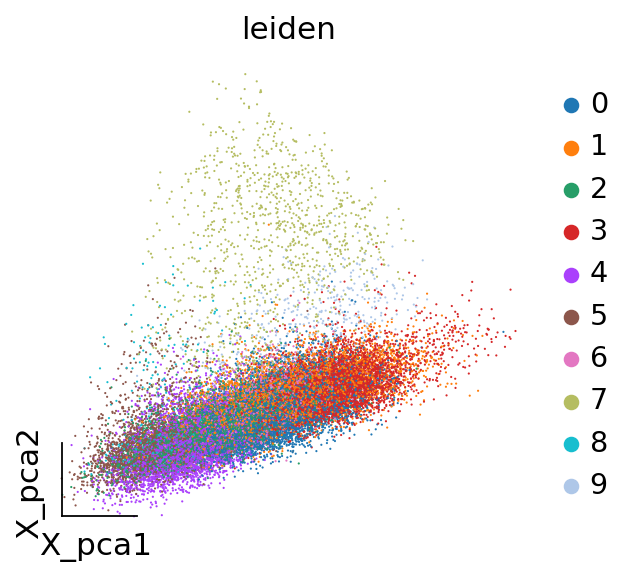

In [72]:
adata_300.obsm['X_pca']=adata_300.obsm['scaled|original|X_pca']
ov.utils.embedding(adata_300,
                  basis='X_pca',
                    color='leiden',
                  frameon='small')
# 将['scaled|original|X_pca']里面的矩阵复制到更标准的位置，即adata.obsm['X_pca']
# obsm是"observation by matrix"的缩写，用于存储每个观测（在这里是单个细胞）在特定降维空间中的坐标。

In [81]:
#adata_all = sc.read_h5ad("filtered_adata.h5ad")

In [86]:
#ov.utils.store_layers(adata_all,layers="counts")
adata_all

......The X of adata have been stored in counts


AnnData object with n_obs × n_vars = 864919 × 1000
    obs: 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden'
    var: 'DisplayName', 'Barcode', 'CodeClass', 'ProbeID'
    uns: 'leiden', 'log1p', 'neighbors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap', 'layers_counts'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'scaled|original|X_pca', 'spatial'
    varm: 'scaled|original|pca_loadings'
    layers: 'counts', 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

In [19]:
#adata_all = ov.pp.preprocess(adata_all,"shiftlog|pearson",n_HVGs=2000,)

In [ ]:
## 加入领域图

In [23]:
sc.pp.neighbors(adata_300,n_neighbors=15, n_pcs = 50,
                 use_rep = "scaled|original|X_pac")

computing neighbors


ValueError: Did not find scaled|original|X_pac in `.obsm.keys()`. You need to compute it first.

In [24]:
sc.pp.neighbors(adata_300, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:14)


In [25]:
sc.pp.neighbors(adata_300, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')
## n_neighbors表示找到附近的15个细胞，n_pcs表示使用pca过后的50个主成分作为输入，use_rep为使用已经标准化|pca化的数据进行计算。

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


In [32]:
adata_300.obs["X_mde"] = ov.utils.mde(adata_300.obsm["scaled|original|X_pca"])
adata_300

ValueError: Expected a 1D array, got an array with shape (31651, 2)

In [28]:
#pip install pymde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 373.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
ov.utils.embedding(adata_300,
                basis='X_mde',
                color='CST3',
                frameon='small')

KeyError: "Could not find 'X_mde' or 'X_X_mde' in .obsm"

In [ ]:
## 或者使用embedding可视化umap

In [34]:
sc.tl.umap(adata_300)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:38)


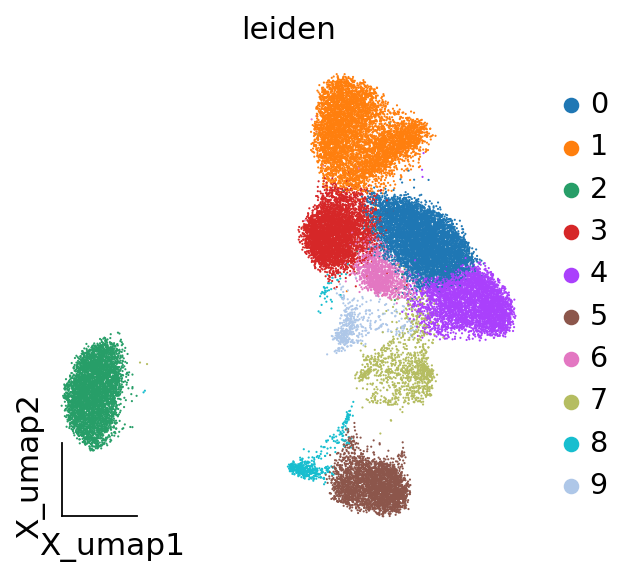

In [70]:
ov.utils.embedding(adata_300,
                basis='X_umap',
                color='leiden',
                frameon='small')

In [ ]:
#                                         聚类分析

In [39]:
sc.tl.leiden(adata_300)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:35)


In [41]:
 ov.utils.embedding(adata_300,
                basis='X_mde',
                color=['leiden', 'CST3', 'NKG7'],
                frameon='small')

KeyError: "Could not find 'X_mde' or 'X_X_mde' in .obsm"

In [42]:
if "CST3" in adata_300.obs.columns:
    print("存在")
else:
    print("不在obs列里面")

不在obs列里面


In [43]:
if "CST3" in adata_300.var_names:
    print("存在")
else:
    print("N")

N


In [48]:
print(list(adata_300.obs.columns))

['fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes']


In [50]:
a = list(adata_300.obs.columns)
print(a)

['fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID_numeric', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'sample', 'leiden', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes']


In [66]:
column_names = ['leiden', 'CST3', 'NKG7']

In [69]:
# 检查指定列名是否存在于obs的列中
for colnum in column_names:
    if colnum in adata_300.obs.columns:
         print("存在于 %s" % (colnum))
    else:
         print("不存在于 %s" % (colnum))

存在于 leiden
不存在于 CST3
不存在于 NKG7


In [73]:
# 检查指定列名是否存在于obs的列中
column_names = ['leiden', 'CST3', 'NKG7']

for column in column_names:
    if column in adata_300.obs.columns:
        print(f"{column} exists in adata.obs.columns.")
    else:
        print(f"{column} does not exist in adata.obs.columns.")


leiden exists in adata.obs.columns.
CST3 does not exist in adata.obs.columns.
NKG7 does not exist in adata.obs.columns.


In [ ]:
## 寻找marker基因

Storing dendrogram info using `.uns['dendrogram_leiden']`
ranking genes
    finished: added to `.uns['leiden_ttest']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


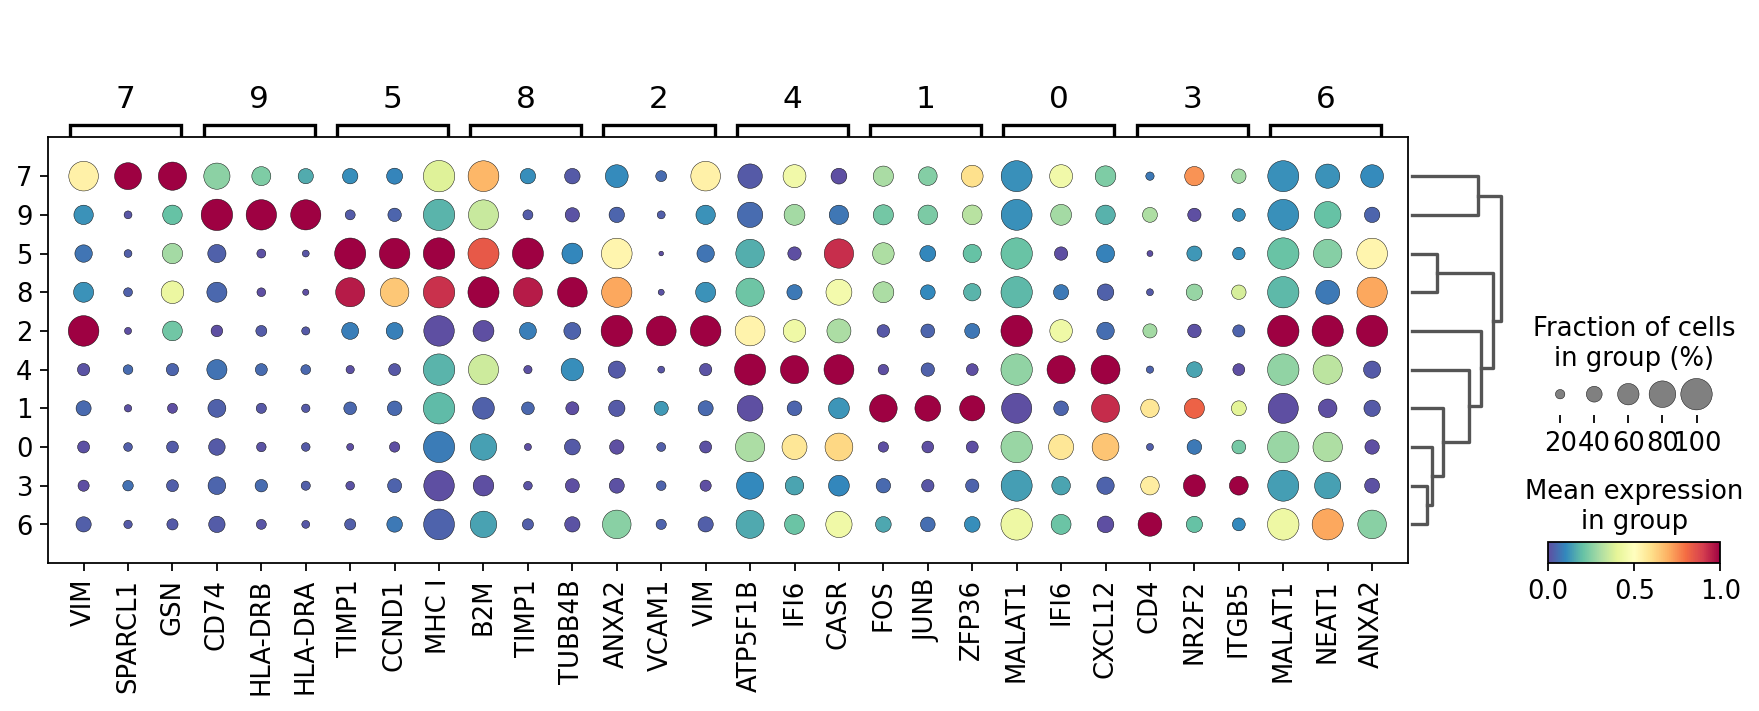

In [74]:
sc.tl.dendrogram(adata_300,'leiden',use_rep='scaled|original|X_pca')
sc.tl.rank_genes_groups(adata_300, 'leiden', use_rep='scaled|original|X_pca',
                        method='t-test',use_raw=False,key_added='leiden_ttest')
sc.pl.rank_genes_groups_dotplot(adata_300,groupby='leiden',
                                cmap='Spectral_r',key='leiden_ttest',
                                standard_scale='var',n_genes=3)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
**finished identifying marker genes by COSG**


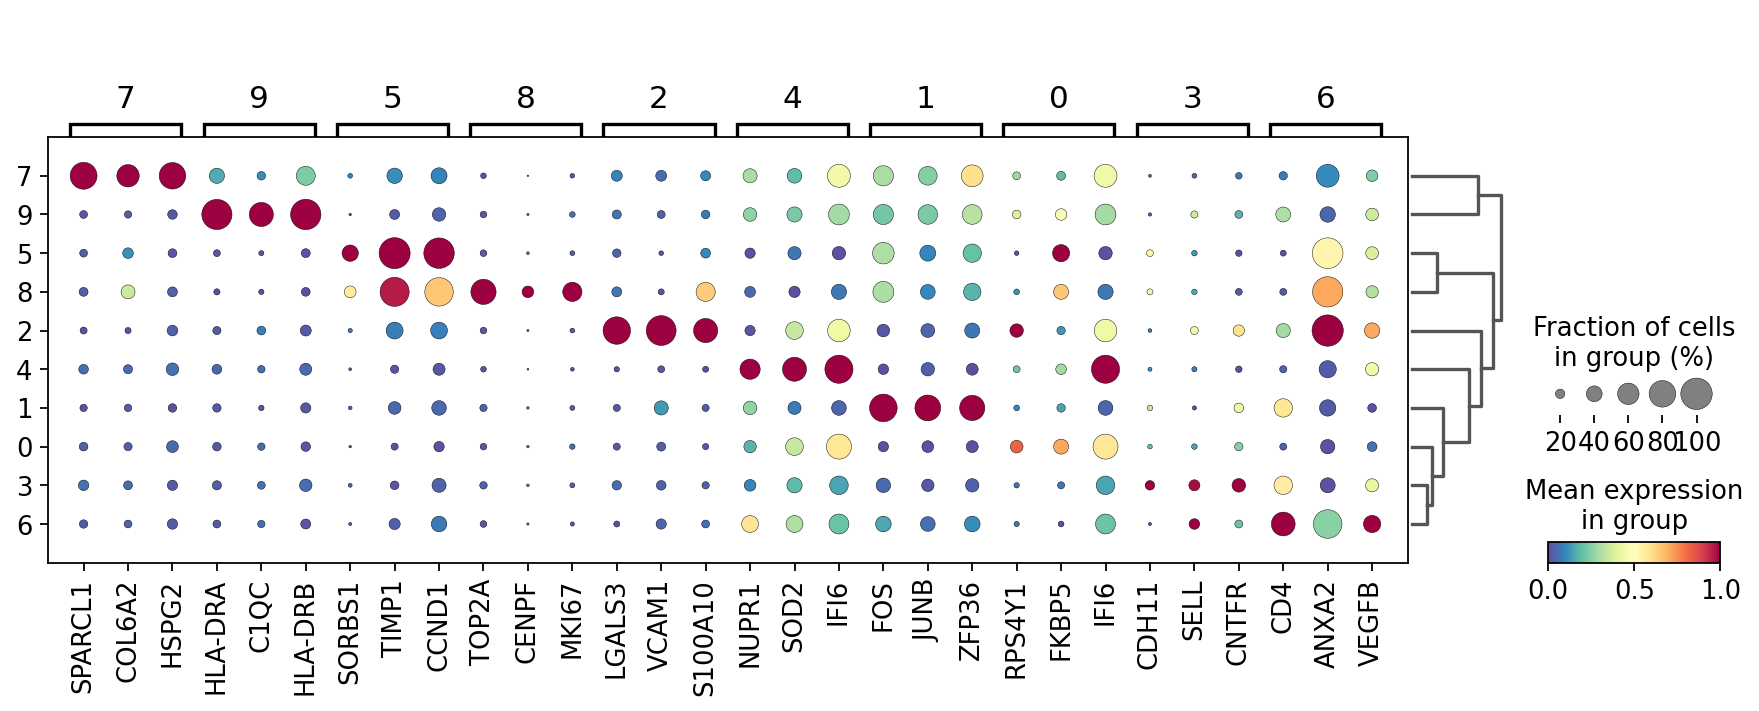

In [77]:
## cosg方法下的markergenes
sc.tl.rank_genes_groups(adata_300, groupby='leiden', 
                        method='t-test',use_rep='scaled|original|X_pca',)
ov.single.cosg(adata_300, key_added='leiden_cosg', groupby='leiden')
sc.pl.rank_genes_groups_dotplot(adata_300,groupby='leiden',
                                cmap='Spectral_r',key='leiden_cosg',
                                standard_scale='var',n_genes=3)

In [ ]:
#                                     其他绘图方法

In [82]:
## 折叠火山图
### 构建其数据集 
data_dict={}
for i in adata_300.obs['leiden'].cat.categories:
    data_dict[i]=sc.get.rank_genes_groups_df(adata_300, group=i, key='leiden_ttest',
                                            pval_cutoff=None,log2fc_min=None)

In [83]:
data_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [84]:
data_dict[i].head()

,names,scores,logfoldchanges,pvals,pvals_adj
0,CD74,205.275406,7.897873,0.000000e+00,0.000000e+00
1,HLA-DRB,72.891907,8.951904,7.911201e-276,3.955600e-273
2,HLA-DRA,72.692322,9.749755,3.375217e-270,1.125072e-267
3,APOE,38.032299,6.734665,5.006621e-150,1.251655e-147
4,HLA-DPA1,35.235649,7.080472,1.120105e-136,2.240210e-134


In [87]:
type_color_dict=dict(zip(adata_300.obs['leiden'].cat.categories,
                         adata_300.uns['leiden_colors']))
type_color_dict

{'0': '#1f77b4',
 '1': '#ff7f0e',
 '2': '#279e68',
 '3': '#d62728',
 '4': '#aa40fc',
 '5': '#8c564b',
 '6': '#e377c2',
 '7': '#b5bd61',
 '8': '#17becf',
 '9': '#aec7e8'}

0 2
2 4
4 6
6 8
8 10
10 12
12 14
14 16
16 18
18 20


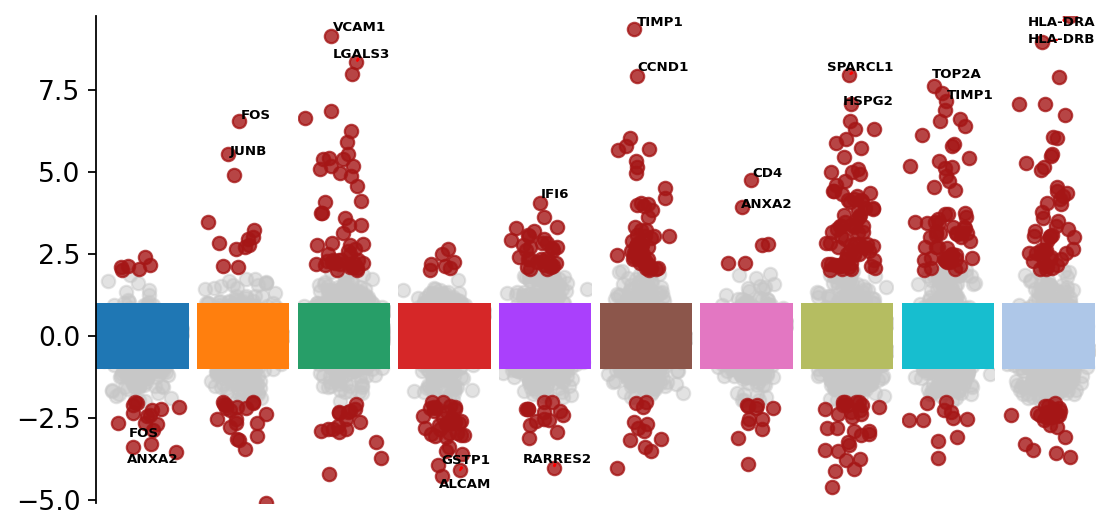

In [92]:
### 开始画图
fig,axes=ov.utils.stacking_vol(data_dict,type_color_dict,
            pval_threshold=0.01,
            log2fc_threshold=2,
            figsize=(8,4),
            sig_color='#a51616',
            normal_color='#c7c7c7',
            plot_genes_num=2,
            plot_genes_fontsize=6,
            plot_genes_weight='bold',
            )

#The following code will be removed in future
y_min,y_max=0,0
for i in data_dict.keys():
    y_min=min(y_min,data_dict[i]['logfoldchanges'].min())
    y_max=max(y_max,data_dict[i]['logfoldchanges'].max())
for i in adata_300.obs['leiden'].cat.categories:
    axes[i].set_ylim(y_min,y_max)